# Aprendizaje Automático en Grafos

### - LECTURA DE FICHEROS

In [111]:
import pandas
import numpy
#Usamos el método read_csv para leer  ENGB_target.csv, y para ello necesitamos pandas.
twitch_users = pandas.read_csv('ENGB_target.csv', skiprows=1 , header=None,
                       names=['id2', 'days', 'mature', 'views',
                              'partner', 'id'], 
                        usecols = ['id', 'days', 'mature', 'views',
                              'partner'] )


In [112]:
cols = ['id', 'days', 'views','partner', 'mature']
twitch_users [['partner']] *= 1 #codificamos la columna de partner a 0=False y 1=True
twitch_users=twitch_users[cols]

In [114]:
twitch_users.head(20)


,id,days,views,partner,mature
0,2299,1459,9528,0,False
1,153,1629,3615,0,True
2,397,411,46546,0,True
3,5623,953,5863,0,True
4,5875,741,5594,0,True
5,3346,1820,4594,0,False
6,6930,2070,18460,0,False
7,6367,846,204,0,True
8,1434,936,1064,0,True
9,4470,973,313084,0,False


### - CREACIÓN DEL GRAFO

In [60]:
#usando la librería networkx (como nx) creamos un grafo vacío
import networkx as nx
G=nx.Graph()

In [61]:
#recorremos las aristas
aristas = pandas.read_csv('ENGB_edges.csv')

In [62]:
aristas1 = aristas[['from', 'to']]

In [63]:
G = nx.from_pandas_edgelist(aristas1, 'from', 'to')

In [64]:
print(G.number_of_edges())
G.number_of_nodes()

35324


7126

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(100, 80))
nx.draw_spring(G, with_labels=True)
#Asi se dibuja el grafo pero es demasiado grande, por lo que no recomendamos ejecutarlo

### - MODELO DE CLASIFICACIÓN _KNN_

In [65]:
from sklearn import preprocessing

atributos = twitch_users.loc[:, 'days': 'partner']  # selección de las columnas de atributos
objetivo = twitch_users['mature']  # selección de la columna objetivo

In [115]:
print(pandas.Series(objetivo).value_counts(normalize=True))

True     0.545608
False    0.454392
Name: mature, dtype: float64


In [133]:
from sklearn import model_selection
from sklearn import neighbors
cv_scores_KNN = {}
for k in range (1,11):                          #EXPLICAR POR QUE USAMOS HAMMING
    clasif_KNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming')  
    cv_scores = model_selection.cross_val_score(clasif_KNN,
                                               atributos,
                                               objetivo,
                                               cv=10)
    cv_scores_KNN[k]= cv_scores.mean()
print(cv_scores_KNN)
mejor_k_KNN = max(cv_scores_KNN, key=cv_scores_KNN.get)
print(f'Mejor suavizado: {mejor_k_KNN}')

TypeError: 'DataFrame' object is not callable

### - MODELO DE CLASIFICACIÓN _Naive Bayes_

In [ ]:
from sklearn import naive_bayes
cv_scores_NB = {}
for k in range (1,11):
    clasif_NB = naive_bayes.CategoricalNB(alpha=k)  # alpha es el parámetro de suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                               atributos,
                                               objetivo,
                                               cv=10)
    cv_scores_NB[k]= cv_scores.mean()
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB, key=cv_scores_NB.get)
print(f'Mejor suavizado: {mejor_k_NB}')

In [141]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos, objetivo)

DecisionTreeClassifier(max_depth=5, random_state=54321)

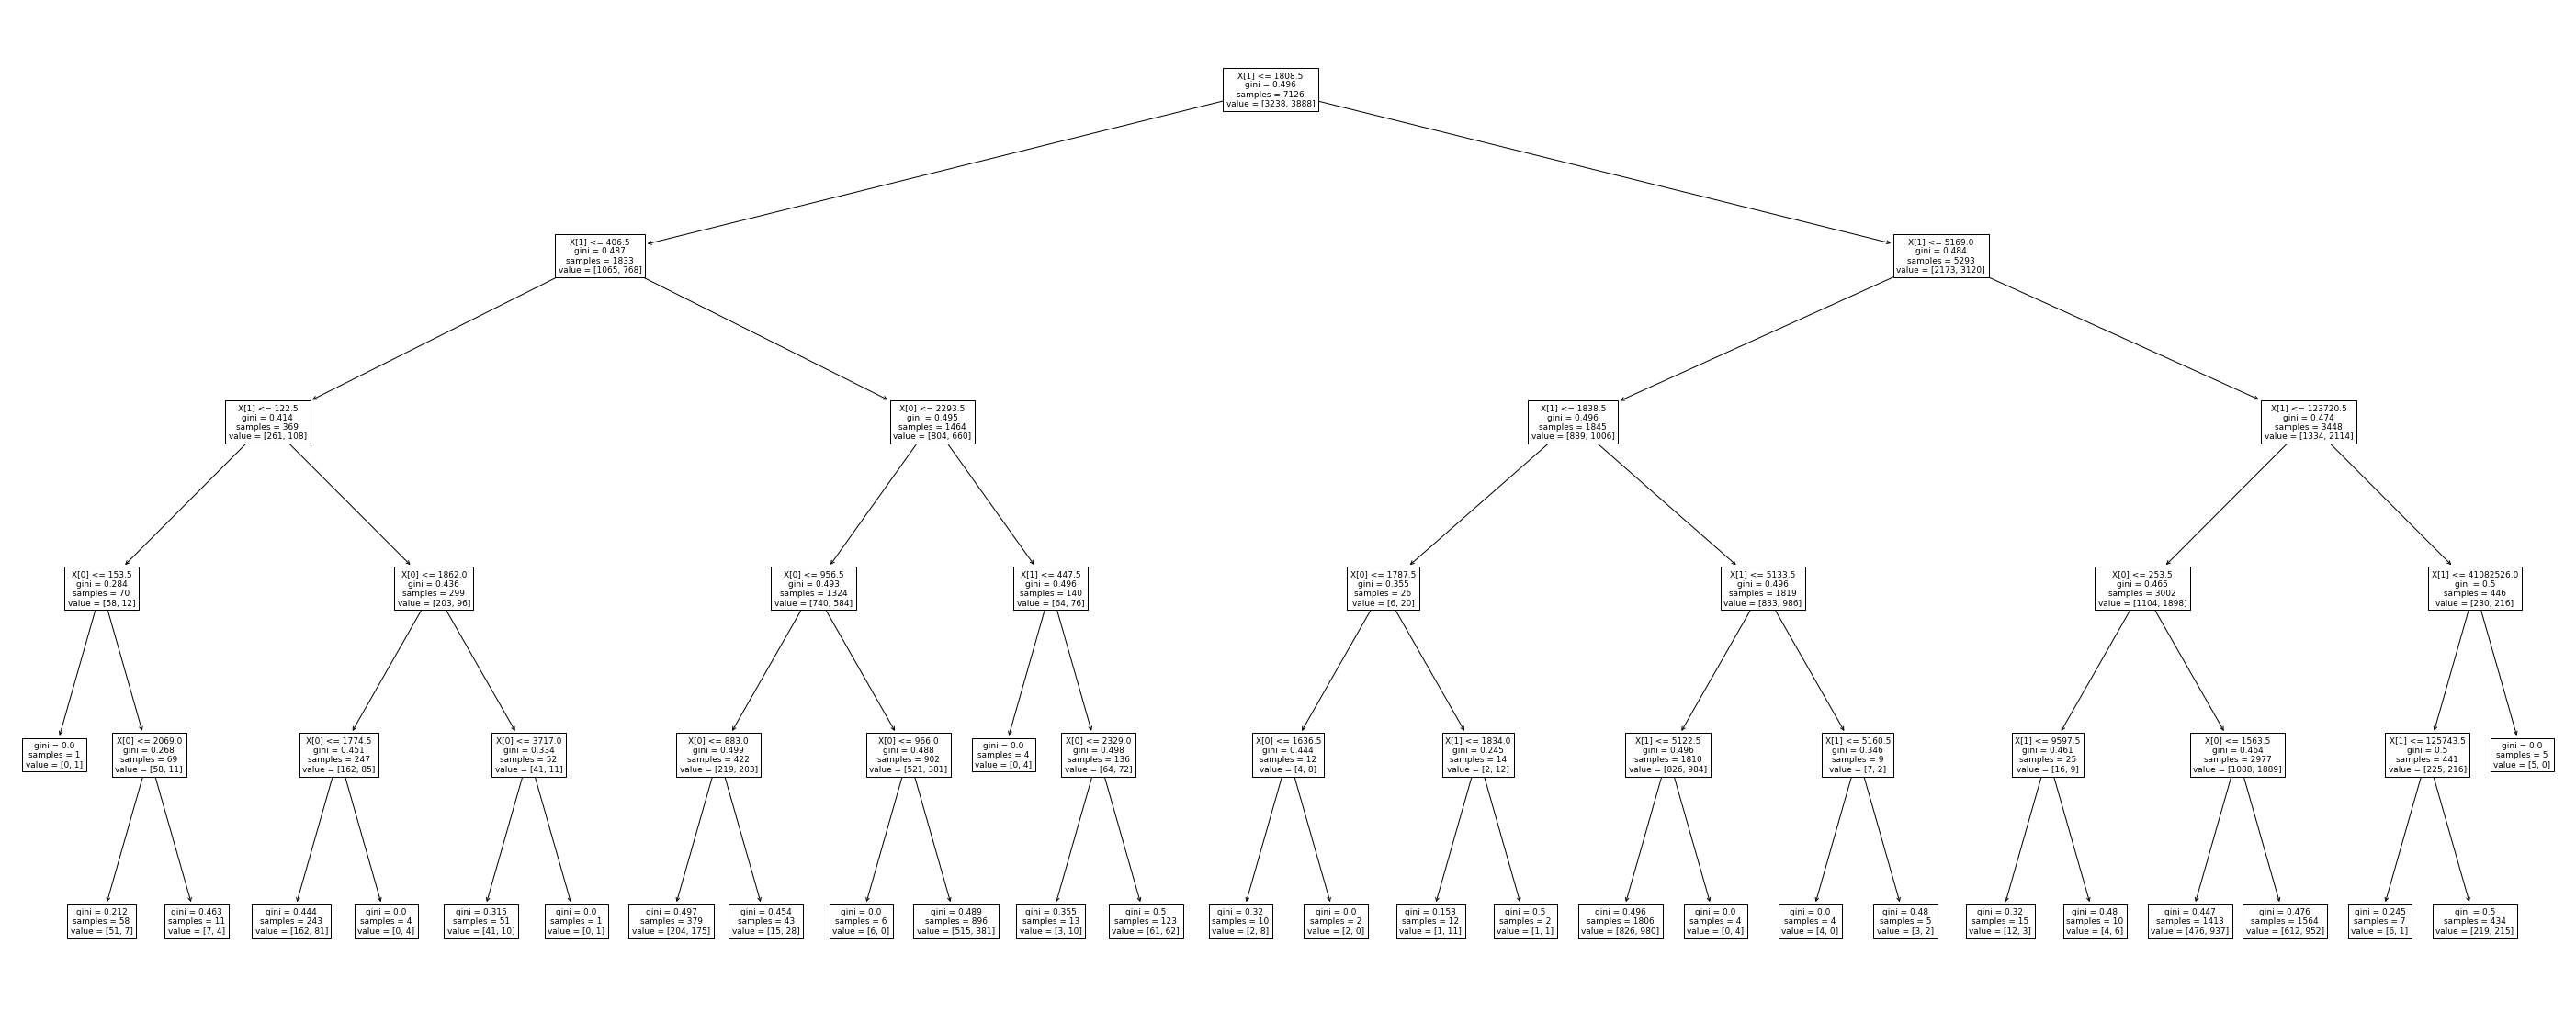

In [144]:
from matplotlib import pyplot
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART)

### - MODELO DE CLASIFICACIÓN _Redes Neuronales_

In [122]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import get_logger
get_logger().setLevel('ERROR')

In [123]:
from tensorflow import random as tensorflow_random

tensorflow_random.set_seed(394867)

In [124]:
from sklearn import model_selection

numpy.random.seed(43958734)
numpy.set_printoptions(threshold=10)

In [125]:
from tensorflow import keras

In [126]:
atributos_numpy = atributos.to_numpy()*1
print(atributos)
print(atributos_numpy)

      days  views  partner
0     1459   9528        0
1     1629   3615        0
2      411  46546        0
3      953   5863        0
4      741   5594        0
...    ...    ...      ...
7121  2624   3174        0
7122  2035   3158        0
7123  1418   3839        0
7124  2046   6208        0
7125  1797   3545        0

[7126 rows x 3 columns]
[[ 1459  9528     0]
 [ 1629  3615     0]
 [  411 46546     0]
 ...
 [ 1418  3839     0]
 [ 2046  6208     0]
 [ 1797  3545     0]]


In [127]:
objetivo_numpy = objetivo.to_numpy().astype(float)
print(objetivo)
print(objetivo_numpy)

0       False
1        True
2        True
3        True
4        True
        ...  
7121    False
7122     True
7123     True
7124     True
7125    False
Name: mature, Length: 7126, dtype: bool
[0. 1. 1. ... 1. 1. 0.]


In [128]:
#normalizador.adapt(atributos_numpy)

In [129]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
    atributos_numpy, objetivo_numpy, test_size=.25)

In [130]:
red_twitch = keras.Sequential()

red_twitch.add(keras.Input(shape=(3,)))
#red_twitch.add(keras.layers.Dense(1))
red_twitch.add(keras.layers.Dense(1, activation='softmax'))
#red_twitch.add(keras.layers.Dense(60, input_dim=(174), activation='relu'))
#función de activación (por defecto, la identidad), Dense(2, activation='softmax')


In [131]:
red_twitch.weights

[<tf.Variable 'dense_13/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.17559743],
        [1.083701  ],
        [0.43011189]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [132]:
#red_twitch.compile(optimizer='SGD', loss='mean_squared_error')
red_twitch.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
red_twitch.fit(atributos_entrenamiento, objetivo_entrenamiento,
                batch_size=256, epochs=10)

Epoch 1/10
21/21 [==============================] - 0s 898us/step - loss: 59227596.0000 - accuracy: 0.5496
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 169295024.0000 - accuracy: 0.5496
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 97594864.0000 - accuracy: 0.5496
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 181270128.0000 - accuracy: 0.5496
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 242342192.0000 - accuracy: 0.5496
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 201286224.0000 - accuracy: 0.5496
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 214826512.0000 - accuracy: 0.5496
Epoch 8/10
21/21 [==============================] - 0s 947us/step - loss: 124242912.0000 - accuracy: 0.5496
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 35467816.0000 - accuracy: 0.5496
Epoch 10/10
21/21 [==========================